# How many gamma-ray BL Lacs are there per steradian?

In [1]:
import pylab as pl
import numpy as np
import astropy.io.fits as pf
from astropy import units as u
from astropy.coordinates import SkyCoord
%matplotlib inline
from matplotlib import pyplot as plt

Let's have a look at the LAT 4FGL catalog. We will first load the catalog from the fits file:

In [2]:
fglfile = "https://fermi.gsfc.nasa.gov/ssc/data/access/lat/8yr_catalog/gll_psc_v19.fit"
hdufgl = pf.open(fglfile)
hf, dataf, columnsf = hdufgl[1].header, hdufgl[1].data, hdufgl[1].columns

We look at the columns we have to play with:

In [3]:
columnsf

ColDefs(
    name = 'Source_Name'; format = '18A'
    name = 'RAJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'DEJ2000'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLON'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'GLAT'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_68_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'Conf_95_SemiMajor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_SemiMinor'; format = 'E'; unit = 'deg'; disp = 'F8.4'
    name = 'Conf_95_PosAng'; format = 'E'; unit = 'deg'; disp = 'F8.3'
    name = 'ROI_num'; format = 'I'; null = 16959
    name = 'Extended_Source_Name'; format = '18A'
    name = 'Signif_Avg'; format = 'E'; disp = 'F8.3'
    name = 'Pivot_Energy'; format = 'E'; unit = 'MeV'; disp = 'F10.2'
    name = 'Flux1000'; format = 'E'; uni

We select BL Lac-type blazars from the catalog:

In [4]:
fgl_bllac = dataf['CLASS1'].lower() == 'bll'
fgl_bl = dataf[fgl_bllac]

We can see how they are distributed in the sky as a function of their declination:

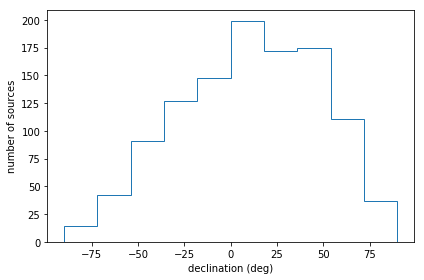

In [5]:
plt.hist(fgl_bl['DEJ2000'], histtype='step', range=(-90,90))
plt.xlabel('declination (deg)')
plt.ylabel('number of sources')
plt.tight_layout()

Is that what we expect? For a better visualization we can have each declination bin cover the same solid angle:

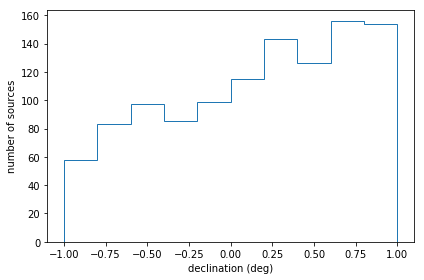

In [6]:
plt.hist(np.sin(fgl_bl['DEJ2000']*u.deg), histtype='step', range=(-1,1))
plt.xlabel('declination (deg)')
plt.ylabel('number of sources')
plt.tight_layout()

We can also see how they are distributed as a function of galactic latitude:

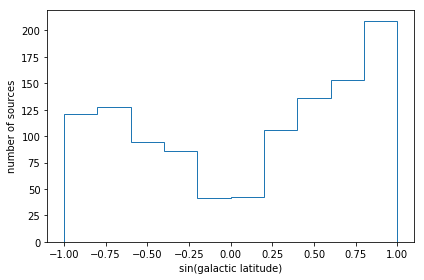

In [7]:
plt.hist(np.sin(fgl_bl['GLAT']*u.deg), histtype='step', range=(-1,1))
plt.xlabel('sin(galactic latitude)')
plt.ylabel('number of sources')
plt.tight_layout()

To obtain a complete sample of BL Lacs, we will exclude the region around the galactic plane:

In [8]:
fgl_bl_clean_idx = np.abs(fgl_bl['GLAT']) > 15.0
fgl_bl_clean = fgl_bl[fgl_bl_clean_idx]

Let's plot the flux distribution of our clean sample of BL Lacs

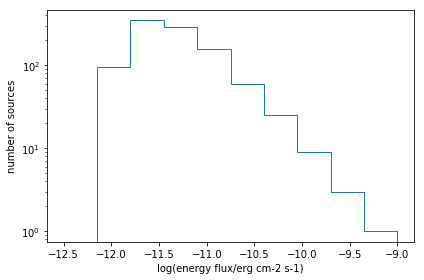

In [9]:
plt.hist(np.log10(fgl_bl_clean['Energy_Flux100']), histtype='step', range=(-12.5,-9))
plt.xlabel('log(energy flux/erg cm-2 s-1)')
plt.yscale('log')
plt.ylabel('number of sources')
plt.tight_layout()

and select the ones above the flux threshold where we can consider that our sample is complete:

In [10]:
fgl_bl_clean_complete_idx = np.log10(fgl_bl_clean['Energy_Flux100']) > -11.0
fgl_bl_clean_complete = fgl_bl_clean[fgl_bl_clean_complete_idx]

This is our complete sample of BL Lacs with $F > 10^{-11}\,$erg cm$^{-2}\,$s$^{-1}$:

In [11]:
counter = 1
for fs in fgl_bl_clean_complete:
    print(counter, fs['ASSOC1'], sep='\t')
    counter = counter + 1

1	MG4 J000800+4712
2	PKS 0019+058
3	KUV 00311-1938
4	RX J0035.2+1515
5	GB6 J0045+2127
6	GB6 J0045+1217
7	PKS 0047+023
8	PKS 0048-09
9	1RXS J005117.7-624154
10	PKS 0055-328
11	GB6 J0100+0745
12	S2 0109+22
13	GB6 J0114+1325
14	PMN J0115+0356
15	RX J0115.7+2519
16	PKS 0118-272
17	B3 0133+388
18	PKS 0139-09
19	SUMSS J014347-584550
20	TXS 0141+268
21	PMN J0152+0146
22	GB6 J0154+0823
23	NVSS J020344+304238
24	PMN J0209-5229
25	MG1 J021114+1051
26	ZS 0214+083
27	3C 66A
28	1RXS J023832.6-311658
29	PKS 0235+164
30	PKS 0301-243
31	GB6 J0316+0904
32	MG3 J032201+2336
33	RBS 0421
34	TXS 0330+291
35	PMN J0334-3725
36	PKS 0332-403
37	RX J0338.4+1302
38	NVSS J034518-235218
39	PKS 0422+00
40	PKS 0426-380
41	PKS 0447-439
42	1ES 0502+675
43	TXS 0506+056
44	PKS 0516-621
45	PMN J0531-4827
46	1RXS J053629.4-334302
47	PKS 0537-441
48	1RXS J054357.3-553206
49	87GB 061258.1+570222
50	PMN J0622-2605
51	PKS 0700-661
52	GB6 J0706+3744
53	NVSS J070651+774137
54	GB6 J0712+5033
55	S5 0716+71
56	PKS 0735+17
57	4C +54

In [12]:
solid_angle = 2*2*np.pi*(np.sin(np.pi/2)-np.sin(15*u.deg))

In [13]:
counter/solid_angle

<Quantity 20.07740091>

There are __~20 BL Lacs with F > 10^-11 erg cm-2 s-1 per steradian__ (a full sphere ~12.56 sr).

# Some useful sources of information if you are looking at the properties of individual AGN:

Find redshift or source class of an object: https://ned.ipac.caltech.edu/

Find how the SED of an object looks like: https://tools.ssdc.asi.it/SED/

Find the coordinates of an object (celestial, galactic, ecliptic): https://heasarc.gsfc.nasa.gov/cgi-bin/Tools/convcoord/convcoord.pl

Find which missions have observed a certain object (you can filter by energy band, time, ...): https://heasarc.gsfc.nasa.gov/cgi-bin/W3Browse/w3browse.pl 